In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
from neuralprophet import NeuralProphet, set_log_level, set_random_seed
set_random_seed(42)
# Disable logging messages unless there is an error
set_log_level("ERROR")

In [23]:
df = pd.read_csv('Data/JapanPopulation2000.10_2020_9.csv', skiprows=[1,2,3])
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2001-01-01,125643
1,2001-02-01,125727
2,2001-03-01,125651
3,2001-04-01,125722
4,2001-05-01,125665


In [35]:
end_train = len(df)-(12*1+9)
train_data = df.iloc[:end_train]
test_data = df.iloc[end_train:]

In [48]:
m = NeuralProphet(yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False)

metrics = m.fit(train_data, freq="MS")


Finding best initial lr:   0%|          | 0/212 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [49]:
# df_train, df_val = m.split_df(train_data, valid_p=0.1)

# print("Dataset size:", len(train_data))
# print("Train dataset size:", len(df_train))
# print("Validation dataset size:", len(df_val))

In [50]:
# metrics = m.fit(df_train, validation_df=df_val, progress=None)
# metrics

In [51]:
# Create a new dataframe reaching 365 into the future for our forecast, n_historic_predictions also shows historic data
df_future = m.make_future_dataframe(train_data, n_historic_predictions=True, periods=21)

# Predict the future
forecast = m.predict(df_future)

# Visualize the forecast
m.plot(forecast)

Predicting: 14it [00:00, ?it/s]

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '265400c4-ea4e-47d8-a41f-560a827f9a86',
              'x': array([datetime.datetime(2001, 1, 1, 0, 0),
                          datetime.datetime(2001, 2, 1, 0, 0),
                          datetime.datetime(2001, 3, 1, 0, 0), ...,
                          datetime.datetime(2020, 7, 1, 0, 0),
                          datetime.datetime(2020, 8, 1, 0, 0),
                          datetime.datetime(2020, 9, 1, 0, 0)], dtype=object),
              'y': array([125715.45678711, 125684.94238281, 125667.75952148, ..., 123947.00393677,
                          123948.80648804, 123881.72647095])},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
    

In [52]:
forecast.tail(24)

,ds,y,yhat1,trend,season_yearly
213,2018-10-01,124349,124443.892151,124439.351562,4.538862
214,2018-11-01,124315,124420.287231,124415.164062,5.121600
215,2018-12-01,124279,124393.584099,124391.757812,1.825419
216,2019-01-01,None,124426.654816,124367.570312,59.083294
217,2019-02-01,None,124351.043457,124343.382812,7.660091
218,2019-03-01,None,124292.067919,124321.539062,-29.468887
219,2019-04-01,None,124289.037557,124297.351562,-8.312095
220,2019-05-01,None,124230.163662,124273.945312,-43.778534
221,2019-06-01,None,124220.990635,124249.757812,-28.764408
222,2019-07-01,None,124232.575134,124226.343750,6.227546


In [53]:
test_data.tail(23)

,ds,y
216,2019-01-01,124329
217,2019-02-01,124196
218,2019-03-01,124133
219,2019-04-01,124103
220,2019-05-01,124045
221,2019-06-01,124020
222,2019-07-01,124030
223,2019-08-01,124031
224,2019-09-01,123928
225,2019-10-01,123886


(587.0, 608.0)

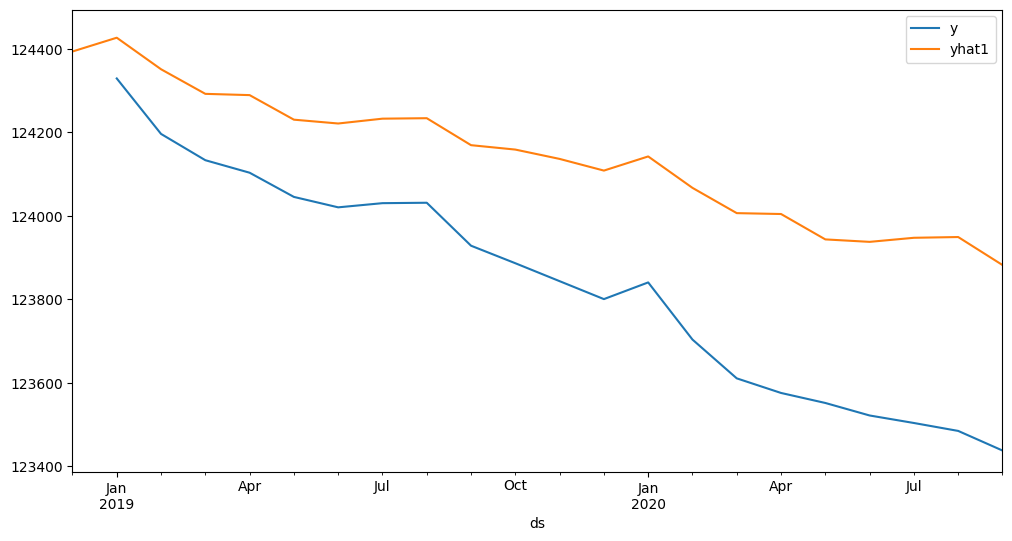

In [54]:
ax = test_data.plot(x='ds', y='y', legend=True,figsize=(12,6))
forecast[-24:].plot(x='ds', y='yhat1', ax=ax)
plt.xlim(('2018-12-01', '2020-09-01'))

In [55]:
from statsmodels.tools.eval_measures import rmse
error = rmse(forecast[:-21]['yhat1'], train_data['y'])
print(f'RMSE Error: {error:11.10}')
# SARIMAX(1, 2, 1)x(1, 0, [], 12) RMSE Error: 41.66685047
# default batchsize RMSE Error: 39.02534069

RMSE Error: 38.62877288


In [56]:
from statsmodels.tools.eval_measures import rmse
error = rmse(forecast[-24:-3]['yhat1'], test_data['y'])
print(f'RMSE Error: {error:11.10}')
# SARIMAX(1, 2, 1)x(1, 0, [], 12) RMSE Error: 82.29751066
# default batchsize RMSE Error: 313.7326784

RMSE Error: 382.8016461
